In [5]:
import graphviz
from graph_utils.graph import Graph, Arc, Node

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [7]:
arcs = [
    Arc(0, 1),
    Arc(1, 2),
    Arc(1, 3),
    Arc(2, 4),
    Arc(1, 4),
    Arc(3, 4)
]

In [8]:
graph = Graph(arcs)

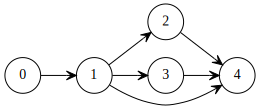

In [9]:
graph.Visualize()

In [10]:
def dfs(graph, node_id, visited, outlist):
    visited.add(node_id)
    graph.nodes[node_id].SetColor('blue')
    outlist.append(graph.Visualize())
    for arc in graph.nodes[node_id].arcs:
        if arc.end not in visited:
            graph.nodes[node_id].SetColor('green')
            arc.attributes['style'] = 'dashed'
            arc.attributes['color'] = 'green'
            dfs(graph, arc.end, visited, outlist) 
            arc.attributes['style'] = 'solid'
            arc.attributes['color'] = 'red'
            graph.nodes[node_id].SetColor('blue')
        else:
            arc.attributes['color'] = 'blue'
        outlist.append(graph.Visualize())      
    graph.nodes[node_id].SetColor('red')            

In [11]:
visited = set()
outlist = []
outlist.append(graph.Visualize())
dfs(graph, 0, visited, outlist)
outlist.append(graph.Visualize())

In [12]:
def step_slice(idx):
    return outlist[idx]

interact(step_slice, idx=widgets.IntSlider(min=0, max=len(outlist)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=12), Output()), _dom_classes=('widget-interact…